<a href="https://colab.research.google.com/github/bupe1800/Marketing/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Segmentation**

##**Introduction**

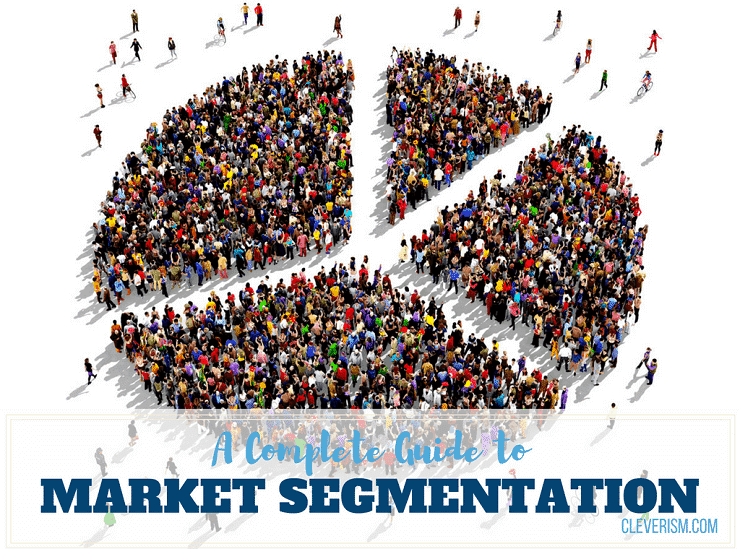

Customer segmentation is the process by which you divide your customers into sub-groups of consumers based on some type of shared characteristics – such as demographics or behaviors, so you can market to those customers more effectively. These customer segmentation groups can also be used to begin discussions of building a marketing persona.

Customer segmentation ia an important marketing strategy used for analyzing and predicting customer value. In this notebook we will group our customers based on recency, frequency and monetary value, this type of customer segmentation is popularly known as **RFM Analysis**.



**Recency:** How recent the customer's last purchase was. 

**Frequency:** Number of orders that customer has placed. 

**Monetary:** Amount of money each customer has spent to purchase the products.

Once we have our customers segmented into different categories based on the RFM scores, we can further gain insights into customer behavior by using predictive models such as K-means Clustering algorithm. 

Our goal is to understand customer behaviour and possibly reduce on the churn rate, therefore, it is also important to conduct a **cohort analysis** and make better product decisions.

A cohort is a group of people with shared characteristics. We can observe how a cohort behaves across time and compare it to other cohorts. Cohort analysis is a behavioral analytics in which you group your customers based on their shared characteristics to better track and understand their actions. Cohort analysis allows you to ask more specific, targeted questions such as who, when and why to make informed product decisions. There are basically two types of cohort analysis;

***1. Acquisition cohorts:*** This is when Groups are divided based on when customers signed up for the product. This will help us determine the who and when.

***2. Behavioral cohorts:*** This is when Groups are divided based on customers behaviors and actions in the product. This will enable us to understand the why. 



##**Lets get started**

###**Importing the required libraries**

In [ ]:
pip install plotly --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

###**Gettitng data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bupe1800/Marketing/main/marketing_campaign.csv', sep = '\t')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


###**Feature engineering**

Since we are only dealing with an **RFM analysis**, we are required to convert all our variables into **recency**, **frequency** and **monetary value**. and this is done as follows;

In [ ]:
data['Frequency'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['Monetary'] =  data['MntWines']+ data['MntFruits']+ data['MntMeatProducts']+ data['MntFishProducts']+ data['MntSweetProducts']+ data['MntGoldProds']  

data_RFM = data[['Recency', 'Frequency', 'Monetary']]
data_RFM.head(4)

,Recency,Frequency,Monetary
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53


WE can therefore take a quick descriptive statistics of our new data.

In [ ]:
data_RFM.describe()

,Recency,Frequency,Monetary
count,2240.000000,2240.000000,2240.000000
mean,49.109375,12.537054,605.798214
std,28.962453,7.205741,602.249288
min,0.000000,0.000000,5.000000
25%,24.000000,6.000000,68.750000
50%,49.000000,12.000000,396.000000
75%,74.000000,18.000000,1045.500000
max,99.000000,32.000000,2525.000000


###**Data cleaning**

In [ ]:
#Check for missing values
data_RFM.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

<Figure size 576x396 with 0 Axes>

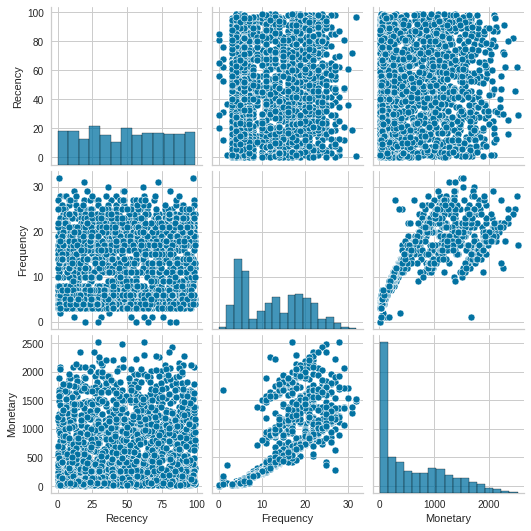

In [ ]:
# Outlier detection
plt.figure()
sns.pairplot(data_RFM) #checking on the relevant features
plt.show()

There seem to be no missing values and no outliers in our RFM data.

##**Exploratory data analysis**

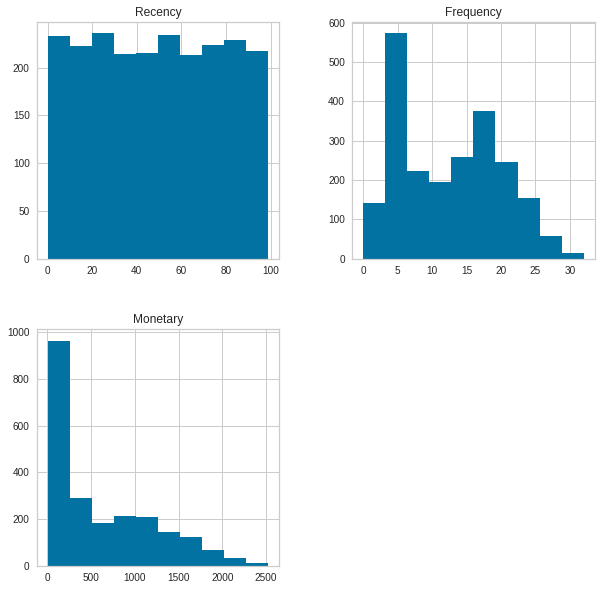

In [ ]:
data_RFM.hist(figsize=(10,10))
plt.show()

,Recency,Frequency,Monetary
Recency,1.000000,0.006410,0.020433
Frequency,0.006410,1.000000,0.820687
Monetary,0.020433,0.820687,1.000000


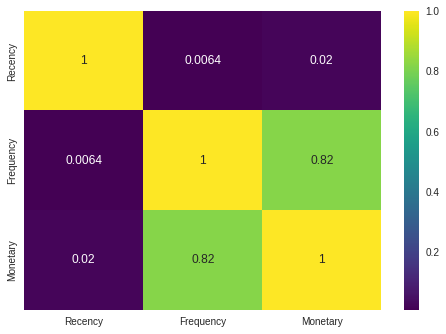

In [ ]:
#Correlation Matrix
corr = data_RFM.corr()
corr = (corr)
sns.heatmap(corr, cmap='viridis', annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

There seem to be a highly positive correlation between recency and monetary, implying that regular customers increases the monetary value of the company.

##**RFM Analysis**

In [ ]:
data_RFM.describe()

,Recency,Frequency,Monetary
count,2240.000000,2240.000000,2240.000000
mean,49.109375,12.537054,605.798214
std,28.962453,7.205741,602.249288
min,0.000000,0.000000,5.000000
25%,24.000000,6.000000,68.750000
50%,49.000000,12.000000,396.000000
75%,74.000000,18.000000,1045.500000
max,99.000000,32.000000,2525.000000


###**Calculating RFM Scores**

We create customer segments from an RFM model by using the **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the best value. 

In [ ]:
quantiles = data_RFM.quantile(q=[0.25,0.50,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,24.0,6.0,68.75
0.50,49.0,12.0,396.00
0.75,74.0,18.0,1045.50


In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def R_Point(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1



def FM_Point(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
data_RFM['R_Quartile'] = data_RFM['Recency'].apply(R_Point, args=('Recency',quantiles))
data_RFM['F_Quartile'] = data_RFM['Frequency'].apply(FM_Point, args=('Frequency',quantiles))
data_RFM['M_Quartile'] = data_RFM['Monetary'].apply(FM_Point, args=('Monetary',quantiles))
data_RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,58,22,1617,2,4,4
1,38,4,27,3,1,1
2,26,20,776,3,4,3
3,26,6,53,3,1,1
4,94,14,422,1,3,3


In [ ]:
data_RFM['RFM_Scores'] = data_RFM.R_Quartile.apply(str) + data_RFM.F_Quartile.apply(str) + data_RFM.M_Quartile.apply(str)
data_RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores
0,58,22,1617,2,4,4,244
1,38,4,27,3,1,1,311
2,26,20,776,3,4,3,343
3,26,6,53,3,1,1,311
4,94,14,422,1,3,3,133


In [ ]:
data_RFM.RFM_Scores.unique()

array(['244', '311', '343', '133', '443', '333', '322', '411', '211',
       '134', '222', '444', '212', '422', '144', '112', '344', '233',
       '433', '434', '111', '243', '122', '334', '124', '312', '143',
       '221', '432', '234', '121', '412', '323', '423', '324', '421',
       '232', '132', '123', '332', '224', '223', '424', '321', '442',
       '214'], dtype=object)

In [ ]:
Best_customers = ['444']
Loyal_Customers=['433','432','443','442','243','143','343','332']
Valuable_Customers=['323','413','423','434','333','233','344','244','144','234','134','334','124','324','224','424','214' ]
Poor_Customers=['222','311','322','223','411','133','132','312','123','421','412','422','321','232']
Very_Poor_Customers=['122','211','112','121','212','221','111'] 

In [ ]:
label = list(np.zeros(len(data_RFM)))
for i in range(len(data_RFM)):
    if data_RFM['RFM_Scores'].iloc[i] in Best_customers : label[i] = "Best Customers"
    elif data_RFM['RFM_Scores'].iloc[i] in Loyal_Customers : label[i] = "Loyal Customers"
    elif data_RFM['RFM_Scores'].iloc[i] in Valuable_Customers : label[i] = "Valuable Customers"
    elif data_RFM['RFM_Scores'].iloc[i] in Poor_Customers : label[i] = "Poor Customers"
    elif data_RFM['RFM_Scores'].iloc[i] in Very_Poor_Customers : label[i] = "Very Poor Customers"
     
        
data_RFM['RFM_Scores_Segments'] = label
data_RFM

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
0,58,22,1617,2,4,4,244,Valuable Customers
1,38,4,27,3,1,1,311,Poor Customers
2,26,20,776,3,4,3,343,Loyal Customers
3,26,6,53,3,1,1,311,Poor Customers
4,94,14,422,1,3,3,133,Poor Customers
...,...,...,...,...,...,...,...,...
2235,46,16,1341,3,3,4,334,Valuable Customers
2236,56,15,444,2,3,3,233,Valuable Customers
2237,91,18,1241,1,3,4,134,Valuable Customers
2238,8,21,843,4,4,3,443,Loyal Customers


In [ ]:
data_RFM['RFM_Scores_Segments'].value_counts()

Poor Customers         735
Valuable Customers     676
Very Poor Customers    447
Loyal Customers        308
Best Customers          74
Name: RFM_Scores_Segments, dtype: int64

Text(0.5, 1.0, '# of Customers by Segments')

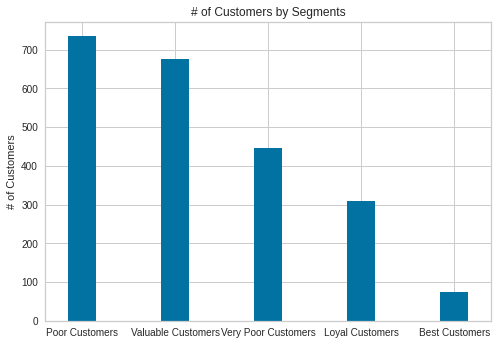

In [ ]:
ax = data_RFM['RFM_Scores_Segments'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Segments')

###**Calculating RFM Points**

In [ ]:
data_RFM['RFM_Points'] = data_RFM[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1).astype('int')
data_RFM

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points
0,58,22,1617,2,4,4,244,Valuable Customers,10
1,38,4,27,3,1,1,311,Poor Customers,5
2,26,20,776,3,4,3,343,Loyal Customers,10
3,26,6,53,3,1,1,311,Poor Customers,5
4,94,14,422,1,3,3,133,Poor Customers,7
...,...,...,...,...,...,...,...,...,...
2235,46,16,1341,3,3,4,334,Valuable Customers,10
2236,56,15,444,2,3,3,233,Valuable Customers,8
2237,91,18,1241,1,3,4,134,Valuable Customers,8
2238,8,21,843,4,4,3,443,Loyal Customers,11


In [ ]:
label = list(np.zeros(len(data_RFM)))

for i in range(len(data_RFM)):
    if data_RFM['RFM_Points'].iloc[i] ==12: label[i] = "Best Customers"  
    elif data_RFM['RFM_Points'].iloc[i] ==11: label[i] = "Valuable Customers"
    elif data_RFM['RFM_Points'].iloc[i] >= 8 : label[i] = "Loyal Customers"
    elif data_RFM['RFM_Points'].iloc[i] >= 6 : label[i] = "Poor Customers"
    else : label[i] = "Very Poor Customers"       
        
data_RFM['RFM_Points_Segments'] = label
data_RFM

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
0,58,22,1617,2,4,4,244,Valuable Customers,10,Loyal Customers
1,38,4,27,3,1,1,311,Poor Customers,5,Very Poor Customers
2,26,20,776,3,4,3,343,Loyal Customers,10,Loyal Customers
3,26,6,53,3,1,1,311,Poor Customers,5,Very Poor Customers
4,94,14,422,1,3,3,133,Poor Customers,7,Poor Customers
...,...,...,...,...,...,...,...,...,...,...
2235,46,16,1341,3,3,4,334,Valuable Customers,10,Loyal Customers
2236,56,15,444,2,3,3,233,Valuable Customers,8,Loyal Customers
2237,91,18,1241,1,3,4,134,Valuable Customers,8,Loyal Customers
2238,8,21,843,4,4,3,443,Loyal Customers,11,Valuable Customers


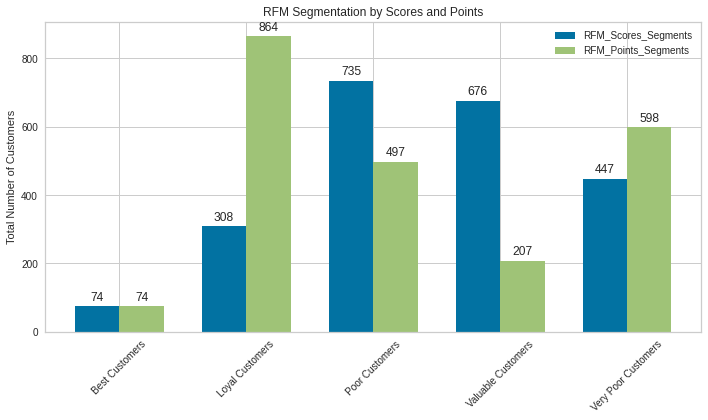

In [ ]:
labels = list(data_RFM.RFM_Scores_Segments.value_counts().sort_index().index)
RFM_Scores_Segments = list(data_RFM.RFM_Scores_Segments.value_counts().sort_index().values)
RFM_Points_Segments = list(data_RFM.RFM_Points_Segments.value_counts().sort_index().values)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, RFM_Scores_Segments, width, label='RFM_Scores_Segments')
rects2 = ax.bar(x + width/2, RFM_Points_Segments, width, label='RFM_Points_Segments')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number of Customers')
ax.set_title('RFM Segmentation by Scores and Points')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

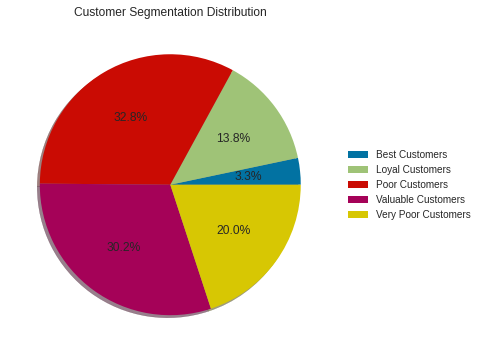

In [ ]:
plt.figure(figsize=(6,6))

# explode = [0.01,0.01,0.1]
plt.pie(data_RFM['RFM_Scores_Segments'].value_counts().sort_index(),autopct='%1.1f%%',shadow=True,startangle=0)
plt.legend(data_RFM['RFM_Scores_Segments'].value_counts().sort_index().index,bbox_to_anchor=(1.45,0.5),loc='center right')
plt.title('Customer Segmentation Distribution')
plt.axis('off')
plt.show()

##**K-Means Analysis**

In [ ]:
data_kmeans = data[['Recency', 'Frequency', 'Monetary']]
data_kmeans.head(4)

,Recency,Frequency,Monetary
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53


In [ ]:
#standardization
std = StandardScaler()
data_RFM_Scaled = pd.DataFrame(std.fit_transform(data_kmeans), columns=data_kmeans.columns)

In [ ]:
data_RFM_Scaled.head()

,Recency,Frequency,Monetary
0,0.307039,1.313544,1.679417
1,-0.383664,-1.185022,-0.961275
2,-0.798086,1.035926,0.282673
3,-0.798086,-0.907403,-0.918094
4,1.550305,0.203070,-0.305254


###**Determining number of clusters**

In [ ]:
#calculating inertia for each k for elbow method
inertias = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_RFM_Scaled)
    inertias.append(kmeans.inertia_)

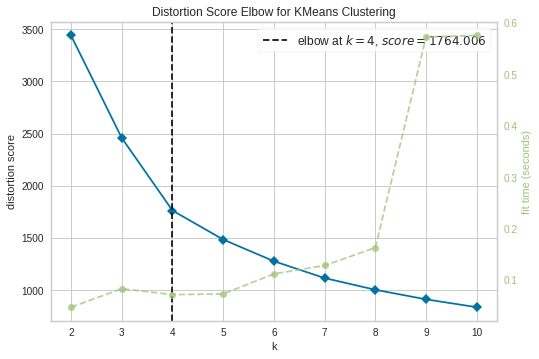

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,11))
Elbow_M.fit(data_RFM_Scaled)
Elbow_M.show()

In [ ]:
#k-means with k=4
kmeans = KMeans(n_clusters=4, random_state=2022)
kmeans.fit(data_RFM_Scaled)

#sorting cluster orders to get same label results in every run
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
luv = np.zeros_like(idx)
luv[idx] = np.arange(4) #lookup values

y_pred = luv[kmeans.labels_] #use label according to lookup values

In [ ]:
#adding the clusters column to the orignal dataframe for further analysis
data_RFM_Scaled["Clusters"]= y_pred
data_kmeans["Clusters"]= y_pred

In [ ]:
data_kmeans

,Recency,Frequency,Monetary,Clusters
0,58,22,1617,3
1,38,4,27,0
2,26,20,776,2
3,26,6,53,0
4,94,14,422,1
...,...,...,...,...
2235,46,16,1341,2
2236,56,15,444,1
2237,91,18,1241,3
2238,8,21,843,2


In [ ]:
labels = kmeans.labels_
data_RFM['Kmeans_Label_ID']=labels

In [ ]:
keys=data_RFM.groupby('Kmeans_Label_ID').Frequency.mean().sort_values().index
values=['Copper','Bronze','Silver','Gold']
dictionary = dict(zip(keys, values))

data_RFM["Clusters"]= y_pred
data_RFM['Kmeans_Label']=data_RFM.Kmeans_Label_ID.apply(lambda x:dictionary[x] )
data_RFM

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments,Kmeans_Label_ID,Clusters,Kmeans_Label
0,58,22,1617,2,4,4,244,Valuable Customers,10,Loyal Customers,2,3,Silver
1,38,4,27,3,1,1,311,Poor Customers,5,Very Poor Customers,3,0,Bronze
2,26,20,776,3,4,3,343,Loyal Customers,10,Loyal Customers,1,2,Gold
3,26,6,53,3,1,1,311,Poor Customers,5,Very Poor Customers,3,0,Bronze
4,94,14,422,1,3,3,133,Poor Customers,7,Poor Customers,0,1,Copper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46,16,1341,3,3,4,334,Valuable Customers,10,Loyal Customers,1,2,Gold
2236,56,15,444,2,3,3,233,Valuable Customers,8,Loyal Customers,0,1,Copper
2237,91,18,1241,1,3,4,134,Valuable Customers,8,Loyal Customers,2,3,Silver
2238,8,21,843,4,4,3,443,Loyal Customers,11,Valuable Customers,1,2,Gold


In [ ]:
data_seg=data_RFM[['RFM_Scores', 'RFM_Scores_Segments', 'RFM_Points', 'RFM_Points_Segments','Clusters','Kmeans_Label']]
data_seg

,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments,Clusters,Kmeans_Label
0,244,Valuable Customers,10,Loyal Customers,3,Silver
1,311,Poor Customers,5,Very Poor Customers,0,Bronze
2,343,Loyal Customers,10,Loyal Customers,2,Gold
3,311,Poor Customers,5,Very Poor Customers,0,Bronze
4,133,Poor Customers,7,Poor Customers,1,Copper
...,...,...,...,...,...,...
2235,334,Valuable Customers,10,Loyal Customers,2,Gold
2236,233,Valuable Customers,8,Loyal Customers,1,Copper
2237,134,Valuable Customers,8,Loyal Customers,3,Silver
2238,443,Loyal Customers,11,Valuable Customers,2,Gold


In [ ]:
data_RFM.Kmeans_Label.value_counts().sort_index()

Bronze    619
Copper    631
Gold      466
Silver    524
Name: Kmeans_Label, dtype: int64

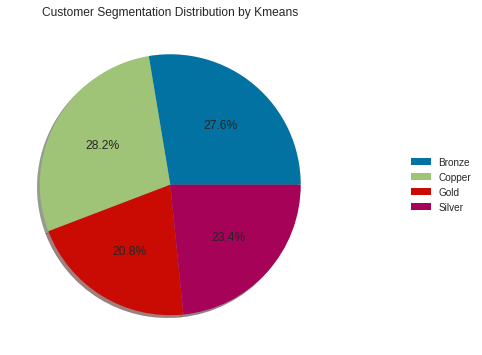

In [ ]:
plt.figure(figsize=(6,6))

explode = [0.01,0.01,0.1]
plt.pie(data_RFM['Kmeans_Label'].value_counts().sort_index(),autopct='%1.1f%%',shadow=True,startangle=0)
plt.legend(data_RFM['Kmeans_Label'].value_counts().sort_index().index,bbox_to_anchor=(1.45,0.5),loc='center right')
plt.title('Customer Segmentation Distribution by Kmeans')
plt.axis('off')
plt.show()

In [ ]:
#setting the colors of clusters
colors_cluster = ['rgb(183, 9, 76)', 'rgb(137, 43, 100)','rgb(69, 94, 137)',
                  'rgb(0, 145, 173)']

In [ ]:
#plotting cluster results
fig = px.scatter_3d(data_RFM_Scaled, x='Recency', y='Monetary', z='Frequency',
                    color='Clusters',title='<b>Cluster Results</b>',
                    opacity=0.5,color_continuous_scale=colors_cluster)

fig.update_traces(marker_size=5)

fig.update_layout(showlegend=False,paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22)

fig.show()

In [ ]:
#convert to long format table
df_rfm_long = pd.melt(data_RFM_Scaled, id_vars='Clusters')

df_rfm_long['Clusters'] = df_rfm_long['Clusters'].astype('str')
df_rfm_long['Clusters']=df_rfm_long['Clusters'].replace({'1': 'Copper', '0': 'Bronze', '3': 'Silver', '2': 'Gold'})

#plotting rfm distributions
fig = px.box(df_rfm_long, x='Clusters', y='value',
             title='<b>RFM Distribution by Cluster</b>',
             color='variable', color_discrete_sequence=colors_cluster,
             boxmode='group')

fig.update_layout(paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22)

fig.show()

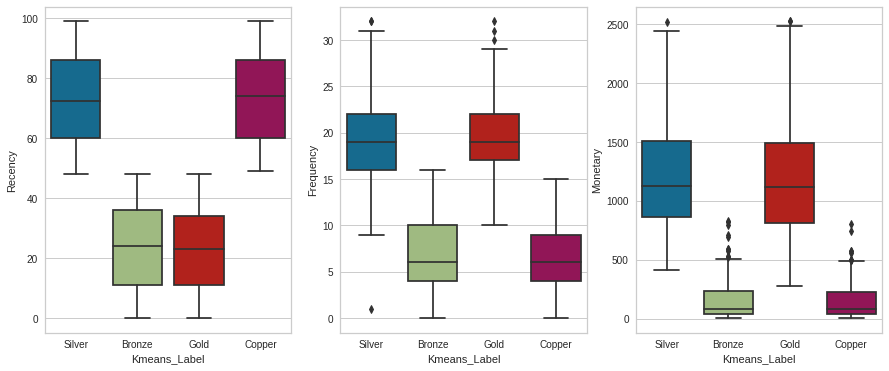

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data_RFM['Kmeans_Label'], data_RFM['Recency'])

plt.subplot(1,3,2)
sns.boxplot(data_RFM['Kmeans_Label'], data_RFM['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(data_RFM['Kmeans_Label'], data_RFM['Monetary'])
plt.show()

In [ ]:
#plotting number of customers in clusters
fig = px.histogram(df_rfm_long, x='Clusters', color='Clusters',
                   color_discrete_sequence=colors_cluster,
                   category_orders=dict(Clusters=[0,1,2,3]),
                   title='<b>Number of Customers in Each Cluster</b>')

fig.update_layout(paper_bgcolor='rgb(229, 236, 246)',title_font_size=22,
                  bargap=0.4)

fig.show()

In [ ]:
#identifying the centroid from original data
centroid = data_RFM.groupby('Clusters')[['Recency','Frequency','Monetary']].agg('mean')
centroid

,Recency,Frequency,Monetary
Clusters,,,
0,23.520194,7.056543,151.368336
1,73.570523,7.012678,146.244057
2,22.950644,19.770386,1184.530043
3,73.145038,19.230916,1181.335878


The K-means algorithm forms 4 clusters. Analysing these clusters, we determine the mean for RFM in each cluster as shown in the tables above.

**Cluster 0 = Low Recency, Low Frequency, Low Monetary:** This group consists of 619 customers with low RFM. We can suspect a possible churn in this group.

**Cluster 1 = High Recency, Low Frequency, Low Monetary:** This group represents 631 customers with a high recency, low frequency and low monetary. This group is likely to consist of new customers.

**Cluster 2 = Low Recency, High Frequency, High Monetary:** This group consists 466 customers with low recency, high frequency and high monetary value. Loyal customers are likely to be found in this group.

**Cluster 3 = High Recency, High Frequency, High Monetary:** The last cluster has 524 customers with higher RFM, and are described to be the best customers.

##**Campaign Perfomance Analysis**

In [ ]:
data["Clusters"]= y_pred

data['Clusters'] = data['Clusters'].astype('str')
data['Clusters']=data['Clusters'].replace({'1': 'Copper', '0': 'Bronze', '3': 'Silver', '2': 'Gold'})

In [ ]:
#getting all the campaign related features
cmpgn = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
               'AcceptedCmp5','Response','Clusters']]

#getting new variable of AllCmp which will be 1 if customers ever accepted any campaign
cmpgn['CmpAccpt'] = np.where((cmpgn.iloc[:,0:5].mean(axis=1))>0,1,0)
cmpgn = cmpgn.sort_values('CmpAccpt')

#shortening column name
new_col = dict(AcceptedCmp1='Cmp1',AcceptedCmp2='Cmp2',
               AcceptedCmp3='Cmp3',AcceptedCmp4='Cmp4',
               AcceptedCmp5='Cmp5',Response='CmpLast')

cmpgn.rename(columns=new_col, inplace=True)

In [ ]:
#plotting campaigns acceptance rate
colors_bin = ['rgb(183, 9, 76)',  'rgb(92, 77, 125)', 'rgb(0, 145, 173)']
fig = px.histogram(cmpgn, x='Clusters', barnorm='percent',
                   color='CmpAccpt',
                   color_discrete_sequence=colors_bin,
                   category_orders=dict(Clusters=[0,1,2,3]),
                   title='<b>Campaigns Acceptance Rate</b>',
                   text_auto = True)

fig.update_layout(paper_bgcolor='rgb(229, 236, 246)',title_font_size=22,
                  bargap=0.4, yaxis_title='Percent (%)')

fig.show()

In [ ]:
#convert table wide to long format for each cluster
cmpgn_long_0 = pd.melt(cmpgn[cmpgn['Clusters']==0][['Cmp1','Cmp2',
                                                    'Cmp3','Cmp4',
                                                    'Cmp5','CmpLast']])
cmpgn_long_1 = pd.melt(cmpgn[cmpgn['Clusters']==1][['Cmp1','Cmp2',
                                                    'Cmp3','Cmp4',
                                                    'Cmp5','CmpLast']])
cmpgn_long_2 = pd.melt(cmpgn[cmpgn['Clusters']==2][['Cmp1','Cmp2',
                                                    'Cmp3','Cmp4',
                                                    'Cmp5','CmpLast']])
cmpgn_long_3 = pd.melt(cmpgn[cmpgn['Clusters']==3][['Cmp1','Cmp2',
                                                    'Cmp3','Cmp4',
                                                    'Cmp5','CmpLast']])

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#plotting campaigns performance on each cluster
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Cluster 0', 'Cluster 1', 'Cluster 2', 
                                    'Cluster 3'),
                    shared_yaxes=True)

fig.add_trace(
    go.Histogram(histfunc='sum', x=cmpgn_long_0['variable'],
                 y=cmpgn_long_0['value'], marker_color=colors_cluster[0],
                 texttemplate='%{y}'),
    row=1, col=1)

fig.add_trace(
    go.Histogram(histfunc='sum', x=cmpgn_long_1['variable'],
                 y=cmpgn_long_1['value'], marker_color=colors_cluster[1],
                 texttemplate='%{y}'),
    row=1, col=2)

fig.add_trace(
    go.Histogram(histfunc='sum', x=cmpgn_long_2['variable'],
                 y=cmpgn_long_2['value'], marker_color=colors_cluster[2],
                 texttemplate='%{y}'),
    row=2, col=1)

fig.add_trace(
    go.Histogram(histfunc='sum', x=cmpgn_long_3['variable'],
                 y=cmpgn_long_3['value'], marker_color=colors_cluster[3],
                 texttemplate='%{y}'),
    row=2, col=2)

fig.update_layout(showlegend=False, paper_bgcolor='rgb(229, 236, 246)',
                  title_text='<b>Campaigns Performance on Each Cluster</b>',
                  title_font_size=22, yaxis_range=[0,150], yaxis3_range=[0,150])